# Import RPB model along with other utility functions

In [1]:
from RPB_model import *

expression symbols from pyomo.core.expr  (deprecated in 6.6.2.dev0) (called
from <frozen importlib._bootstrap>:241)


# Creating model for a single side/section of the RPB

In [ ]:
# Create model instance. Currently, mode can be either "adsorption" or "desorption" which sets the boundary conditions for each case.
# m=RPB_model(mode="adsorption")
# or
m=RPB_model(mode="desorption", gas_flow_direction=-1)

# Custom initialization routine. Uses a homotopy routine to adjust the initialization factors so that all equations are 'active'.
single_section_init(m)
# homotopy_init_routine(m)

In [ ]:
# Some various utility functions that I have been using to check model performance
evaluate_MB_error(m)

print(f'CO2 Capture = {m.CO2_capture():.3}')

check_scaling(m)

# degen_hunter(m)

jac, variables, constraints = scaling_script(m)

In [ ]:
plotting(m)

In [ ]:
print(jac.getcol(2046))

In [ ]:
variables[1406].pprint()

In [ ]:
constraints[613].pprint()

In [ ]:
constraints[3835].pprint()

In [ ]:
constraints[3836].pprint()

In [ ]:
constraints[2496].pprint()

In [ ]:
variables[461].pprint()

In [ ]:
variables[768].pprint()

In [ ]:
[m.Rs_CO2[z,o]() for z,o in m.dheat_fluxdz.keys()]

In [ ]:
print(iscale.get_scaling_factor(constraints[927]))

# Creating a full RPB model

In [2]:
RPB = full_model_creation(lean_temp_connection=True, configuration = "counter-current")
init_routine_1(RPB)

0
Ipopt 3.13.2: max_iter=500


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computati

In [3]:
fix_capture_and_solve(RPB, capture=0.95)

component keys that are not exported as part of the NL file.  Skipping.
component keys that are not exported as part of the NL file.  Skipping.
Ipopt 3.13.2: max_iter=1000
bound_push=1e-22


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of th

In [ ]:
report(RPB)

In [ ]:
evaluate_MB_error(RPB.ads)

In [126]:
check_scaling(RPB)

component keys that are not exported as part of the NL file.  Skipping.
component keys that are not exported as part of the NL file.  Skipping.
2023-09-29 15:16:00 [WARNING] idaes.core.util.scaling: Nonsquare Jacobian using pseudo inverse
Jacobian Condition Number: 4.21e+10


In [ ]:
jac, variables, constraints = scaling_script(RPB)

In [ ]:
print(jac.getcol(19))

In [ ]:
constraints[4308].pprint()

In [ ]:
constraints[3964].pprint()

In [ ]:
variables[1760].pprint()

In [ ]:
variables[1739].pprint()

In [ ]:
variables[7419].pprint()

In [ ]:
print(iscale.get_scaling_factor(constraints[2722]))

In [ ]:
print(iscale.get_scaling_factor(variables[4336]))

In [ ]:
[RPB.ads.dTsdo[z,o]() for z,o in RPB.ads.dTsdo.keys()]

# Save and load model

In [ ]:
# save model
to_json(RPB, fname="counter current opt 1.json.gz", gz=True, human_read=False)

In [ ]:
# create model, load, and solve
RPB = full_model_creation(lean_temp_connection=True, configuration = "counter-current")

from_json(RPB, fname="counter current base case.json.gz", gz=True)

solver = SolverFactory("ipopt")
solver.options = {
    "max_iter": 1000,
    "bound_push": 1e-22,
    # "halt_on_ampl_error": "yes",
}
solver.solve(RPB, tee=True).write()

In [108]:
RPB = full_model_creation(lean_temp_connection=True, configuration = "counter-current")

# create regularization parameter for the objective function
RPB.alpha_obj = Param(initialize=0.9, mutable=True)

# add objective
@RPB.Expression()
def obj(RPB):
    return RPB.alpha_obj * RPB.energy_requirement/10 - (1 - RPB.alpha_obj) * RPB.productivity/20

RPB.objective = Objective(expr=RPB.obj)

from_json(RPB, fname="counter current opt 1.json.gz", gz=True)

{'etime_load_file': 0.06523585319519043,
 'etime_read_dict': 0.2352449893951416,
 'etime_read_suffixes': 0.0247955322265625}

Optimization Testing

In [ ]:
RPB.objective.pprint()

In [ ]:
# create regularization parameter for the objective function
RPB.alpha_obj = Param(initialize=0.9, mutable=True)

# add objective
@RPB.Expression()
def obj(RPB):
    return RPB.alpha_obj * RPB.energy_requirement/10 - (1 - RPB.alpha_obj) * RPB.productivity/20

RPB.objective = Objective(expr=RPB.obj)

In [ ]:
RPB.ads.L.setlb(0.5)
RPB.ads.L.setub(20)
RPB.ads.L.pprint()

In [ ]:
RPB.ads.Tx.setlb(25+273)
RPB.ads.Tx.setub(95+273)
RPB.ads.Tx.pprint()

In [ ]:
RPB.des.Tx.setlb(100+273)
RPB.des.Tx.setub(160+273)
RPB.des.Tx.pprint()

In [ ]:
RPB.des.P_in.setub(1.5)
RPB.des.P_in.setlb(1.0133)
RPB.des.P_in.pprint()

In [ ]:
degrees_of_freedom(RPB)

In [ ]:
RPB.ads.w_rpm.setlb(0.5)
RPB.ads.w_rpm.setub(5)
RPB.ads.w_rpm.pprint()

In [ ]:
# free up decision variables
RPB.ads.L.unfix()
RPB.ads.theta.unfix()
RPB.des.P_in.unfix()
RPB.ads.Tx.unfix()
RPB.des.Tx.unfix()
RPB.ads.w_rpm.unfix()

In [14]:
degrees_of_freedom(RPB)

5

In [15]:
results = SolverFactory("gams").solve(
    RPB,
    tee=True,
    keepfiles=True,
    solver="conopt4",
    tmpdir="temp",
    add_options=["gams_model.optfile=1;"],
)

--- Job model.gms Start 09/29/23 11:38:34 40.4.0 d540b52e WEX-WEI x86 64bit/MS Windows
--- Applying:
    C:\GAMS\40\gmsprmNT.txt
--- GAMS Parameters defined
    Input "c:\Users\hughesr\NETL\CCSI\fixed bed adsorption\fixed_bed_adsorption\Rotary packed bed\temp\model.gms"
    Output "c:\Users\hughesr\NETL\CCSI\fixed bed adsorption\fixed_bed_adsorption\Rotary packed bed\temp\output.lst"
    ScrDir "c:\Users\hughesr\NETL\CCSI\fixed bed adsorption\fixed_bed_adsorption\Rotary packed bed\temp\225c\"
    SysDir C:\GAMS\40\
    CurDir "c:\Users\hughesr\NETL\CCSI\fixed bed adsorption\fixed_bed_adsorption\Rotary packed bed\temp\"
    LogOption 3
Licensee: Medium MUD - 10 User License                   G211229|0002CN-GEN
          U.S. Department of Energy, National Energy Technology LaborDC9138
          C:\Users\hughesr\Documents\GAMS\gamslice.txt
          License Admin: Anthony P. Burgard, anthony.burgard@netl.doe.gov  
Processor information: 1 socket(s), 8 core(s), and 16 thread(s) available


In [ ]:
# solve
solver = SolverFactory("ipopt")
solver.options = {
    "max_iter": 1000,
    "bound_push": 1e-8,
    # "halt_on_ampl_error": "yes",
    "tol": 1e-4,
    "max_cpu_time": 5*60,
    # "mu_strategy": "adaptive",
}
solver.solve(RPB, tee=True).write()

In [4]:
report(RPB)

,Value,Doc,Fixed
ads.L,3.000000,Bed Length [m],True
ads.D,10.000000,Bed diameter [m],True
ads.w_rpm,0.750000,bed rotational speed [revolutions/min],True
ads.theta,0.750000,Fraction of bed [-],True
des.theta,0.250000,Fraction of bed [-],False
ads.P_in,1.025960,Inlet flue gas pressure [bar],False
ads.P_out,1.013250,Outlet adsorber pressure [bar],True
ads.F_in,133.634901,Inlet adsorber gas flow [mol/s],False
ads.Tg_in,363.000000,Inlet flue gas temperature [K],True
ads.Tx,363.000000,"heat exchange fluid temperature, constant [K]",True


In [ ]:
[RPB.ads.qCO2_eq[z,o]() for z,o in RPB.ads.qCO2_eq.keys()]

In [ ]:
RPB.ads.Tx()

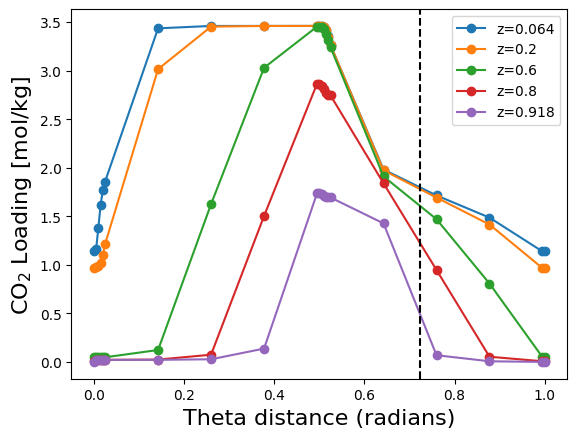

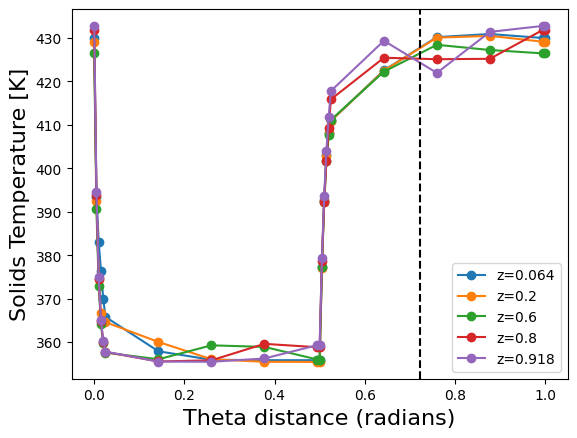

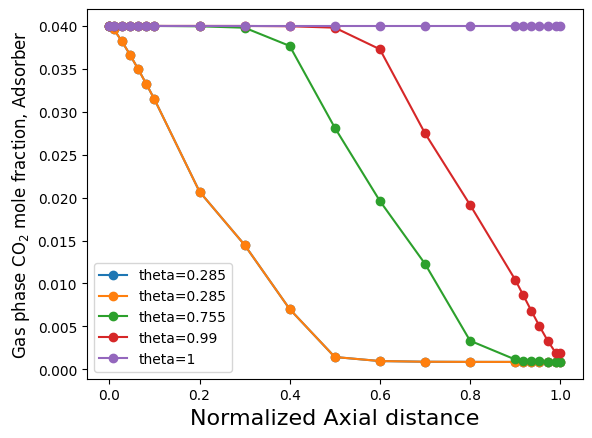

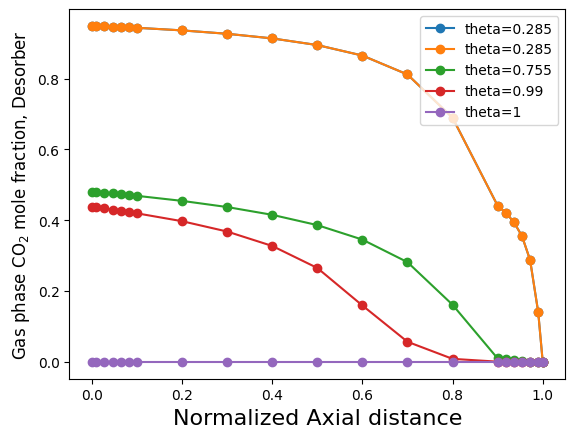

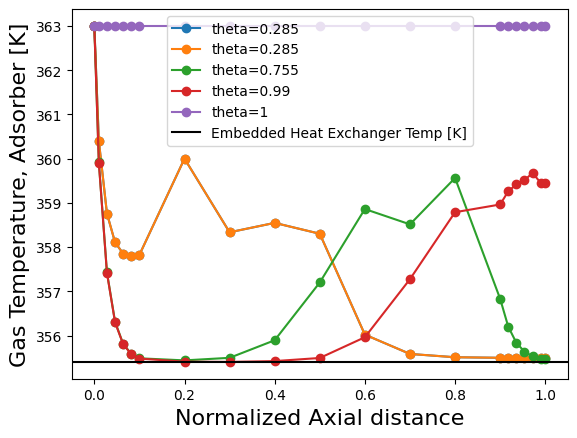

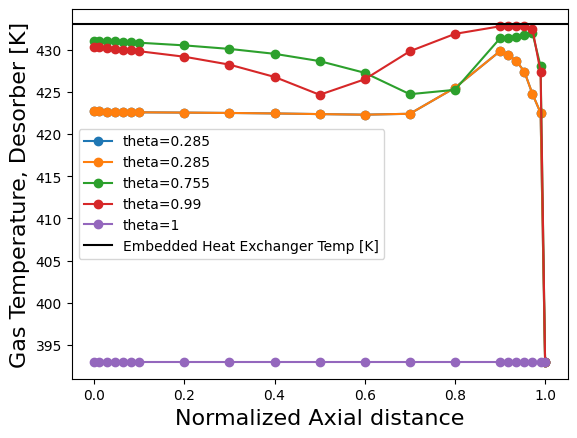

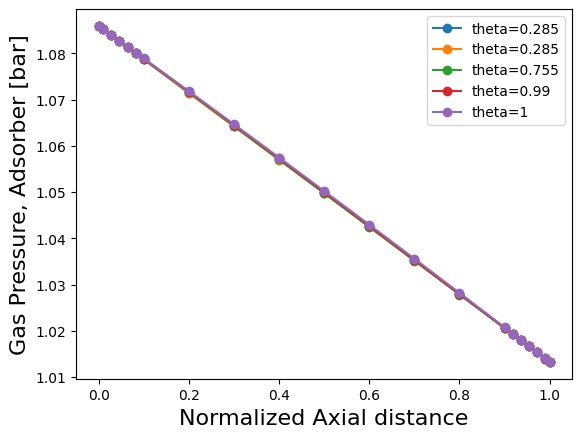

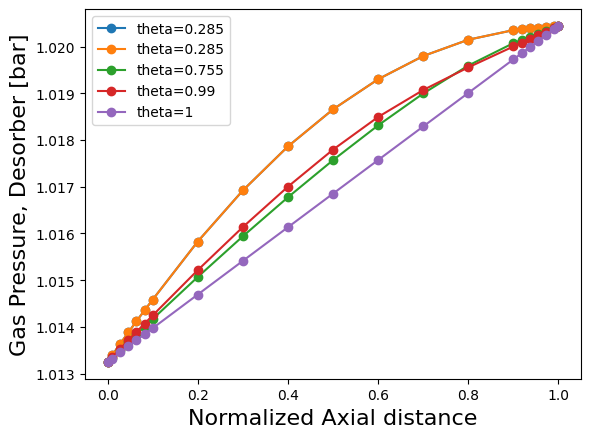

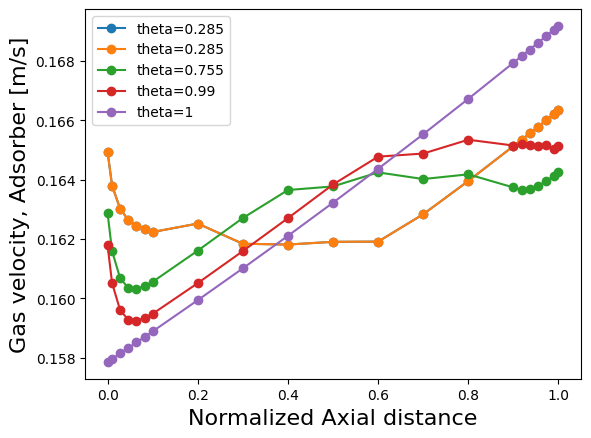

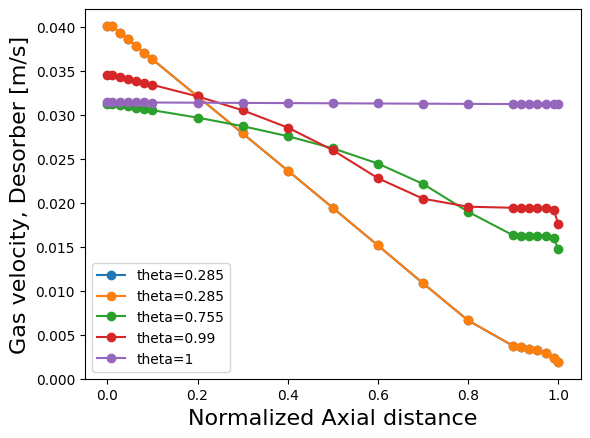

In [111]:
full_contactor_plotting(RPB)

In [ ]:
RPB.ads.Q_ghx_tot_kW()

In [ ]:
len(list(RPB.ads.z))

Sensitivity Testing

In [ ]:
RPB.objective = Objective(expr=0)

In [ ]:
RPB.ads.CO2_capture=0.9

In [ ]:
RPB.ads.theta.fix()

In [ ]:
RPB.ads.theta = 0.7
RPB.des.theta = 0.3

In [ ]:
RPB.ads.w_rpm = 0.0005

In [109]:
results = SolverFactory("gams").solve(
    RPB,
    tee=True,
    keepfiles=True,
    solver="conopt4",
    tmpdir="temp",
    add_options=["gams_model.optfile=1;"],
)

--- Job model.gms Start 09/29/23 13:44:55 40.4.0 d540b52e WEX-WEI x86 64bit/MS Windows
--- Applying:
    C:\GAMS\40\gmsprmNT.txt
--- GAMS Parameters defined
    Input "c:\Users\hughesr\NETL\CCSI\fixed bed adsorption\fixed_bed_adsorption\Rotary packed bed\temp\model.gms"
    Output "c:\Users\hughesr\NETL\CCSI\fixed bed adsorption\fixed_bed_adsorption\Rotary packed bed\temp\output.lst"
    ScrDir "c:\Users\hughesr\NETL\CCSI\fixed bed adsorption\fixed_bed_adsorption\Rotary packed bed\temp\225c\"
    SysDir C:\GAMS\40\
    CurDir "c:\Users\hughesr\NETL\CCSI\fixed bed adsorption\fixed_bed_adsorption\Rotary packed bed\temp\"
    LogOption 3
Licensee: Medium MUD - 10 User License                   G211229|0002CN-GEN
          U.S. Department of Energy, National Energy Technology LaborDC9138
          C:\Users\hughesr\Documents\GAMS\gamslice.txt
          License Admin: Anthony P. Burgard, anthony.burgard@netl.doe.gov  
Processor information: 1 socket(s), 8 core(s), and 16 thread(s) available


In [110]:
report(RPB)

,Value,Doc,Fixed
ads.L,10.001000,Bed Length [m],False
ads.D,10.000000,Bed diameter [m],True
ads.w_rpm,0.001000,bed rotational speed [revolutions/min],True
ads.theta,0.723501,Fraction of bed [-],False
des.theta,0.276499,Fraction of bed [-],False
ads.P_in,1.085961,Inlet flue gas pressure [bar],False
ads.P_out,1.013250,Outlet adsorber pressure [bar],True
ads.F_in,222.190846,Inlet adsorber gas flow [mol/s],False
ads.Tg_in,363.000000,Inlet flue gas temperature [K],True
ads.Tx,355.398398,"heat exchange fluid temperature, constant [K]",False


In [ ]:
[RPB.ads.qCO2[z,o]() for z,o in RPB.ads.qCO2_eq.keys()]

In [82]:
RPB.alpha_obj = 0.999

In [104]:
RPB.alpha_obj()

0.9

In [101]:
RPB.ads.a_sp = 30
RPB.des.a_sp = 30

In [85]:
alpha_list=[0.999,0.99,0.95,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05,0.01,0.001]

In [105]:
E = []
P = []

for j in alpha_list:
    RPB.alpha_obj = j

    results = SolverFactory("gams").solve(
        RPB,
        tee=True,
        keepfiles=True,
        solver="conopt4",
        tmpdir="temp",
        add_options=["gams_model.optfile=1;"],
    )

    E.append(RPB.energy_requirement())
    P.append(RPB.productivity())


--- Job model.gms Start 09/29/23 13:30:49 40.4.0 d540b52e WEX-WEI x86 64bit/MS Windows
--- Applying:
    C:\GAMS\40\gmsprmNT.txt
--- GAMS Parameters defined
    Input "c:\Users\hughesr\NETL\CCSI\fixed bed adsorption\fixed_bed_adsorption\Rotary packed bed\temp\model.gms"
    Output "c:\Users\hughesr\NETL\CCSI\fixed bed adsorption\fixed_bed_adsorption\Rotary packed bed\temp\output.lst"
    ScrDir "c:\Users\hughesr\NETL\CCSI\fixed bed adsorption\fixed_bed_adsorption\Rotary packed bed\temp\225c\"
    SysDir C:\GAMS\40\
    CurDir "c:\Users\hughesr\NETL\CCSI\fixed bed adsorption\fixed_bed_adsorption\Rotary packed bed\temp\"
    LogOption 3
Licensee: Medium MUD - 10 User License                   G211229|0002CN-GEN
          U.S. Department of Energy, National Energy Technology LaborDC9138
          C:\Users\hughesr\Documents\GAMS\gamslice.txt
          License Admin: Anthony P. Burgard, anthony.burgard@netl.doe.gov  
Processor information: 1 socket(s), 8 core(s), and 16 thread(s) available


In [106]:
E

[4.918242804084191,
 4.918244106153281,
 4.918273867259059,
 4.918363336801889,
 4.918761064159256,
 4.933427499171998,
 4.935266218100078,
 4.937273645113541,
 4.948165156713686,
 4.950762799952871,
 4.950840184386525,
 4.950858240468416,
 4.950862574710065,
 4.950865051057517,
 4.95088646029881]

In [107]:
P

[2.528800753793012,
 2.529273282199132,
 2.5312141766236977,
 2.533423079065484,
 2.5378561995243407,
 2.641124440126016,
 2.6479681435188107,
 2.653025628823552,
 2.672060343519497,
 2.675265179098067,
 2.6753211579190563,
 2.6753280174819047,
 2.67532873934189,
 2.675328898079906,
 2.6753289871632115]

In [125]:
[RPB.des.qCO2[z,o]() for z,o in RPB.ads.qCO2_eq.keys()]

[2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 3.458290958776713,
 3.450801731375445,
 3.436028972678649,
 3.400485224238231,
 3.330034421746029,
 3.239771390159456,
 1.973891105424557,
 1.719521661363495,
 1.506339577732054,
 1.18947686159263,
 1.18947686159263,
 3.460006681596087,
 3.456606332198259,
 3.447155687847672,
 3.414092056646189,
 3.344034517633229,
 3.25345343601979,
 1.979366918424789,
 1.718810138403219,
 1.500633537716202,
 1.173876005496397,
 1.173876005496397,
 3.460559745383003,
 3.458661172726018,
 3.451492774092044,
 3.419602928432902,
 3.349867447310357,
 3.259272530686587,
 1.981285338944084,
 1.717336062353381,
 1.49399370763172,
 1.156854743385196,
 1.156854743385196,
 3.460768254590351,
 3.459459828454128,
 3.453164268580641,
 3.421679243475048,
 3.352197565762528,
 3.261712463749198,
 1.98160609971527,
 1.715434193693329,
 1.486694346972953,
 1.138596987079793,
 1.138596987079793,
 3.460846829281324,
 3.459759426142619,
 3.453702521686899,

In [124]:
for z,o in RPB.ads.qCO2_eq.keys():
    print(f'{o},') 

0,
0.01,
0.02,
0.03,
0.04,
0.05,
0.285,
0.52,
0.755,
0.99,
1,
0,
0.01,
0.02,
0.03,
0.04,
0.05,
0.285,
0.52,
0.755,
0.99,
1,
0,
0.01,
0.02,
0.03,
0.04,
0.05,
0.285,
0.52,
0.755,
0.99,
1,
0,
0.01,
0.02,
0.03,
0.04,
0.05,
0.285,
0.52,
0.755,
0.99,
1,
0,
0.01,
0.02,
0.03,
0.04,
0.05,
0.285,
0.52,
0.755,
0.99,
1,
0,
0.01,
0.02,
0.03,
0.04,
0.05,
0.285,
0.52,
0.755,
0.99,
1,
0,
0.01,
0.02,
0.03,
0.04,
0.05,
0.285,
0.52,
0.755,
0.99,
1,
0,
0.01,
0.02,
0.03,
0.04,
0.05,
0.285,
0.52,
0.755,
0.99,
1,
0,
0.01,
0.02,
0.03,
0.04,
0.05,
0.285,
0.52,
0.755,
0.99,
1,
0,
0.01,
0.02,
0.03,
0.04,
0.05,
0.285,
0.52,
0.755,
0.99,
1,
0,
0.01,
0.02,
0.03,
0.04,
0.05,
0.285,
0.52,
0.755,
0.99,
1,
0,
0.01,
0.02,
0.03,
0.04,
0.05,
0.285,
0.52,
0.755,
0.99,
1,
0,
0.01,
0.02,
0.03,
0.04,
0.05,
0.285,
0.52,
0.755,
0.99,
1,
0,
0.01,
0.02,
0.03,
0.04,
0.05,
0.285,
0.52,
0.755,
0.99,
1,
0,
0.01,
0.02,
0.03,
0.04,
0.05,
0.285,
0.52,
0.755,
0.99,
1,
0,
0.01,
0.02,
0.03,
0.04,
0.05,
0.285,
0.52,
0.755,
0.99,
1,
0,
0.01,